# TF-IDF Model Training

In [10]:
import pandas as pd

In [70]:
# Load data (LIAR Dataset)
data_df_train_true_raw = pd.read_csv('../../dataset/LIAR/data/train_true.csv', sep=',', header=0)
data_df_test_true_raw = pd.read_csv('../../dataset/LIAR/data/test_true.csv', sep=',', header=0)
data_df_valid_true_raw = pd.read_csv('../../dataset/LIAR/data/valid_true.csv', sep=',', header=0)

data_df_train_false_raw = pd.read_csv('../../dataset/LIAR/data/train_false.csv', sep=',', header=0)
data_df_test_false_raw = pd.read_csv('../../dataset/LIAR/data/test_false.csv', sep=',', header=0)
data_df_valid_false_raw = pd.read_csv('../../dataset/LIAR/data/valid_false.csv', sep=',', header=0)

data_df_train_raw = pd.read_csv('../../dataset/LIAR/data/train.csv', sep=',', header=0)
data_df_test_raw = pd.read_csv('../../dataset/LIAR/data/test.csv', sep=',', header=0)
data_df_valid_raw = pd.read_csv('../../dataset/LIAR/data/valid.csv', sep=',', header=0)


In [71]:
# Merge all data
master_df = pd.concat([data_df_train_raw, data_df_test_raw, data_df_valid_raw], ignore_index=True)
print(master_df.shape)
master_df.head(5)

(12791, 15)


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,statement_processed
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say Annies List political group support trimes...
1,10540.json,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natural gas take star...
2,324.json,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Hillary Clinton agree John McCain vote George ...
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation likely mandate ...
4,9028.json,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,economic turnaround start end term


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

In [73]:
from sklearn.model_selection import train_test_split

In [79]:
liar_X = master_df['statement']
liar_y = list(map(lambda x: 1 if x else 0, master_df['label']))

In [44]:
# X_train = data_df_train_raw['statement_processed']
# y_train = data_df_train_raw['label']
# X_test = data_df_test_raw['statement_processed']
# y_test = data_df_test_raw['label']

# vectorizer = TfidfVectorizer() 
# train_vectors = vectorizer.fit_transform(X_train)
# test_vectors = vectorizer.transform(X_test)

# X = master_df['statement_processed']
# y = master_df['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# (X_train.shape, y_train.shape)

((10232,), (10232,))

In [47]:
X_train

8368     conservative republican president lose 750,000...
3664     Tea Party Congressman Frank Guinta vote billio...
11944                            black baby abort NYC bear
8853                 cut taxis 23 time mayor New York City
3025     new Arizona immigration law police stop check ...
                               ...                        
11524                Congress spend 66 100 day term recess
8322                                    Obamacare not help
11939    say Charlie Bass forfeit right equal cost tv a...
2926     say Congressman Steve Cohen take office 2007 u...
9483     Barack Obama end getting elect large gender ga...
Name: statement_processed, Length: 10232, dtype: object

## FakeNewsNet

In [20]:
# Load Data
df_fnn = pd.read_pickle('../../dataset/FakeNewsNet/data/FakeNewsNet.pkl')

In [21]:
df_fnn

,text,processed_text,label
0,On Air with Ryan Seacrest is offering you a ch...,"[air, ryan, seacrest, offer, chance, win, nigh...",false
1,‘American Idol’ final: How to vote for the sea...,"[american, idol, final, vote, season, winner, ...",false
2,@ScottDisick @KrisJenner @khloekardashian — LA...,"[latest, art, shame, revenge, prank, banksy, s...",false
3,@foquinha Youngblood - 5 Seconds of Summer \nO...,"[youngblood, seconds, summer, little, mix, del...",false
4,Kylie Jenner ‘Open’ To Reconciliation With Tyg...,"[kylie, jenner, open, reconciliation, tyga, pr...",false
...,...,...,...
1368182,"@JenKirkman Hell, are you familiar with classi...","[hell, familiar, classic, hollywood, guy, like...",true
1368183,@NBCNewsPR @MeetThePress @chucktodd @RepAdamSc...,"[think, sleepy, eye, chuck, well, trunp, say, ...",true
1368184,Have you seen our Spotlight report on Initial ...,"[see, spotlight, report, initial, teacher, edu...",true
1368185,President Trump’s First Address to a Joint Ses...,"[president, trump, address, joint, session, co...",true


In [26]:
# Shuffle and random pick 10000 each label
df_fnn_smaller = pd.concat(
    [
        df_fnn[df_fnn["label"] == 'true'].sample(10000),
        df_fnn[df_fnn["label"] == 'false'].sample(10000),
    ]
)

# Shuffle the order of the dataset
df_fnn = df_fnn_smaller.sample(frac=1).reset_index(drop=True)
df_fnn

,text,processed_text,label
0,"Kim &lt;b&gt;Kardashian&lt;/b&gt; ""Jealous"" Si...","[kim, jealous, sister, kourtney, have, baby, g...",false
1,"KOURTNEY KARDASHIAN So, About That Breakup … H...","[kourtney, kardashian, breakup, hang, younes]",false
2,'Magic Mike' Is Bearing It All On MTV Right No...,"[magic, mike, bear, mtv, right, get, swath, st...",false
3,Marilyn Manson Cuts Concert Short After Appare...,"[marilyn, manson, cut, concert, short, apparen...",true
4,@coleyworld @bethsinniresist I hate #NAZIS My ...,"[hate, nazi, family, fight, wwii, ass, allow, ...",false
...,...,...,...
19995,REVENGE \nJennifer Aniston #movieactress #Peop...,"[revenge, jennifer, aniston, movieactress, peo...",false
19996,This Is What Drake Bell Looks Like Under All H...,"[drake, bell, look, like, clothing]",true
19997,Met Gala: Met Gala 2017: See the Red Carpet Ar...,"[met, gala, met, gala, red, carpet, arrivals]",true
19998,We Are All Self-made — Kim Kardashian Defends ...,"[self, kim, kardashian, defends, kylie, jenner]",false


In [28]:
df_fnn['label_raw'] = df_fnn['label']
df_fnn['label'] = df_fnn['label_raw'].apply(lambda x: 1 if x == 'true' else 0)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(list(map(lambda x: ' '.join(x), df_fnn['processed_text'])), df_fnn['label'], test_size=0.2, random_state=2023)

In [53]:
print(len(X_train), y_train.shape)


16000 (16000,)


In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_cf(y, pred_y, title):
    conf_matrix = confusion_matrix(y, pred_y)

    fig, ax = plt.subplots()

    sns.heatmap(conf_matrix, annot=True, fmt='g')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.title(title)
    
    return plt

## Random Forest

#### Training

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [55]:
pipeline_rf = Pipeline(
    [
        ("vect", TfidfVectorizer(use_idf=True)),
        ("clf", RandomForestClassifier(n_jobs=-2)),
    ]
)

parameters_rf = {
    "clf__n_estimators": [50, 100, 200, 500],       # default=100
}

In [56]:
clf_rf = GridSearchCV(pipeline_rf, parameters_rf)
result_rf = clf_rf.fit(X_train, y_train)

In [57]:
result_rf

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(n_jobs=-2))]),
             param_grid={'clf__n_estimators': [50, 100, 200, 500]})

In [69]:
print(clf_rf.best_params_)

{'clf__n_estimators': 500}


In [58]:
# save model
from joblib import dump
dump(result_rf, 'clf_rf.joblib')

['clf_rf.joblib']

#### Evaluation

In [138]:
# laod model
from joblib import load
clf_rf = load('clf_rf.joblib') 

In [139]:
from sklearn.metrics import classification_report

y_pred = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1959
           1       0.87      0.85      0.86      2041

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

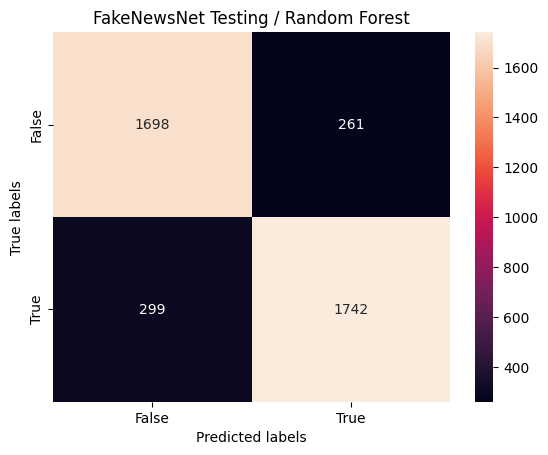

In [140]:
plot_cf(y_test, y_pred, 'FakeNewsNet Testing / Random Forest')

<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

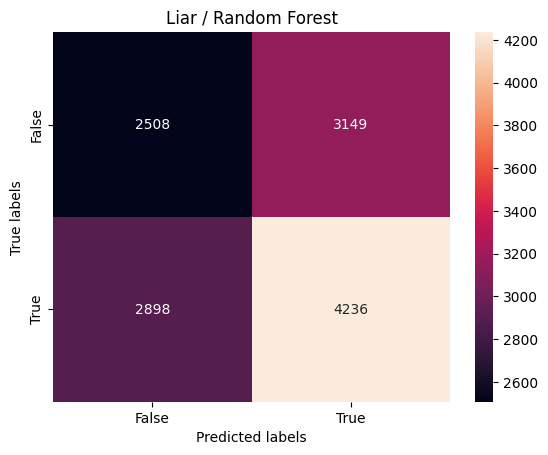

In [141]:
plot_cf(liar_y, clf_rf.predict(liar_X), 'Liar / Random Forest')

In [80]:
y_pred = clf_rf.predict(X_test)

print(classification_report(liar_y, clf_rf.predict(liar_X)))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45      5657
           1       0.57      0.59      0.58      7134

    accuracy                           0.53     12791
   macro avg       0.52      0.52      0.52     12791
weighted avg       0.53      0.53      0.53     12791



In [63]:
pd.DataFrame({"X_test": X_test, "y_test":y_test,"y_pred": y_pred})

,X_test,y_test,y_pred
8648,like strange thing actually happen probably die,0,0
15597,beg pardon america like concede wake remember ...,0,0
6810,president privy information average citizen he...,1,1
17882,katie holmes jamie foxx timeline relationship,0,0
3789,ask sanders true,1,0
...,...,...,...
9493,kris jenner desperately try save kylie life ky...,0,0
16164,total renewable incr short term energy outlook...,1,1
9415,thor ragnarok teaser trailer debuts superhero ...,1,1
4110,angelina jolie open divorce brad pitt time family,0,0


## Support Vector Machine Classifier

In [64]:
from sklearn.svm import SVC

In [67]:
pipeline_svc = Pipeline(
    [
        ("vect", TfidfVectorizer(use_idf=True)),
        ("clf", SVC()),
    ]
)

parameters_svc = {
    "clf__C": [0.1, 1, 10],  # default=1.0
    "clf__kernel": ["rbf"],  # default="rbf"
    "clf__degree": [3, 5],  # default=3
}


In [137]:
clf_svc

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf', SVC())]),
             n_jobs=-2,
             param_grid={'clf__C': [0.1, 1, 10], 'clf__degree': [3, 5],
                         'clf__kernel': ['rbf']})

In [68]:
clf_svc = GridSearchCV(pipeline_svc, parameters_svc, n_jobs=-2)
result_svc = clf_svc.fit(X_train, y_train)

print(result_svc.best_params_)

{'clf__C': 10, 'clf__degree': 3, 'clf__kernel': 'rbf'}


In [132]:
# save model
from joblib import dump
dump(result_svc, 'clf_svc.joblib')

['clf_svc.joblib']

In [133]:
# laod model
from joblib import load
clf_svc = load('clf_svc.joblib') 

In [145]:
y_pred = clf_svc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1959
           1       0.89      0.90      0.90      2041

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [146]:
y_pred = clf_svc.predict(X_test)

print(classification_report(liar_y, clf_svc.predict(liar_X)))

              precision    recall  f1-score   support

           0       0.47      0.34      0.40      5657
           1       0.57      0.69      0.63      7134

    accuracy                           0.54     12791
   macro avg       0.52      0.52      0.51     12791
weighted avg       0.53      0.54      0.53     12791



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

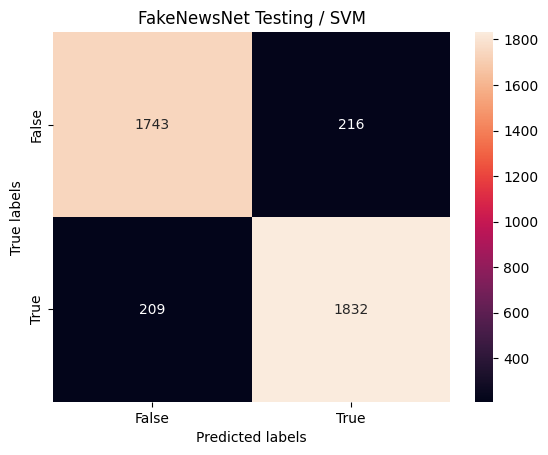

In [147]:
plot_cf(y_test, y_pred, 'FakeNewsNet Testing / SVM')

<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

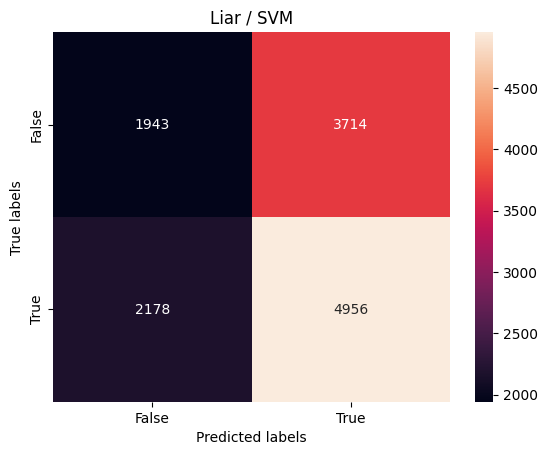

In [148]:
plot_cf(liar_y, clf_svc.predict(liar_X), 'Liar / SVM')

## Gaussian Naive Bayes

In [232]:
from sklearn.naive_bayes import BernoulliNB


In [233]:
pipeline_nb = Pipeline(
    [
        ("vect", TfidfVectorizer(use_idf=True)),
        ("clf", BernoulliNB()),
    ]
)


In [234]:
result_nb = pipeline_nb.fit(X_train, y_train)

print(result_nb.get_params())

{'memory': None, 'steps': [('vect', TfidfVectorizer()), ('clf', BernoulliNB())], 'verbose': False, 'vect': TfidfVectorizer(), 'clf': BernoulliNB(), 'vect__analyzer': 'word', 'vect__binary': False, 'vect__decode_error': 'strict', 'vect__dtype': <class 'numpy.float64'>, 'vect__encoding': 'utf-8', 'vect__input': 'content', 'vect__lowercase': True, 'vect__max_df': 1.0, 'vect__max_features': None, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__preprocessor': None, 'vect__smooth_idf': True, 'vect__stop_words': None, 'vect__strip_accents': None, 'vect__sublinear_tf': False, 'vect__token_pattern': '(?u)\\b\\w\\w+\\b', 'vect__tokenizer': None, 'vect__use_idf': True, 'vect__vocabulary': None, 'clf__alpha': 1.0, 'clf__binarize': 0.0, 'clf__class_prior': None, 'clf__fit_prior': True, 'clf__force_alpha': 'warn'}


In [235]:
# save model
from joblib import dump
dump(result_nb, 'clf_nb.joblib')

['clf_nb.joblib']

In [236]:
from joblib import load
clf_nb = load('clf_nb.joblib')

In [237]:
y_pred = clf_nb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.57      0.44      0.50      1157
        True       0.61      0.73      0.67      1402

    accuracy                           0.60      2559
   macro avg       0.59      0.59      0.58      2559
weighted avg       0.59      0.60      0.59      2559



## Learning Curve

In [238]:
from joblib import load
clf_rf = load('clf_rf.joblib') 
clf_svc = load('clf_svc.joblib') 
clf_nb = load('clf_nb.joblib') 

In [239]:
# Print classification report of each model
print("Random Forest")
print(classification_report(y_test, clf_rf.predict(X_test)))
print("SVM")
print(classification_report(y_test, clf_svc.predict(X_test)))
print("Naive Bayes")
print(classification_report(y_test, clf_nb.predict(X_test)))

Random Forest
              precision    recall  f1-score   support

       False       0.60      0.43      0.50      1157
        True       0.62      0.76      0.68      1402

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.59      2559
weighted avg       0.61      0.61      0.60      2559

SVM
              precision    recall  f1-score   support

       False       0.60      0.40      0.48      1157
        True       0.61      0.78      0.69      1402

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.58      2559
weighted avg       0.61      0.61      0.59      2559

Naive Bayes
              precision    recall  f1-score   support

       False       0.57      0.44      0.50      1157
        True       0.61      0.73      0.67      1402

    accuracy                           0.60      2559
   macro avg       0.59      0.59      0.58      2559
weighted avg       0.59      0.60      0.59 

In [240]:
estimators = {
    "Random Forest": clf_rf.estimator,
    "SVM": clf_svc.estimator,
    "Navie Bayes": clf_nb,
}

/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
63813.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63826.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63830.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


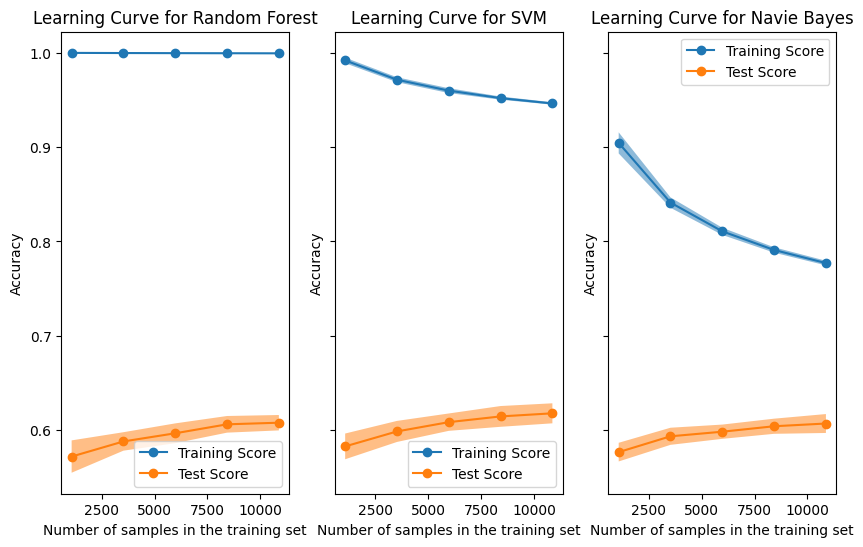

In [248]:
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=len(estimators), figsize=(10, 6), sharey=True)


common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=25, test_size=0.15),
    "score_type": "both",
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
    "n_jobs": -2,
}

for ax_idx, estimator_key in enumerate(estimators.keys()):

    LearningCurveDisplay.from_estimator(
        estimators[estimator_key], **common_params, ax=ax[ax_idx]
    )
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[: len(estimators)], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator_key}")

fig.savefig("learning_curve.png", dpi=300, bbox_inches="tight")


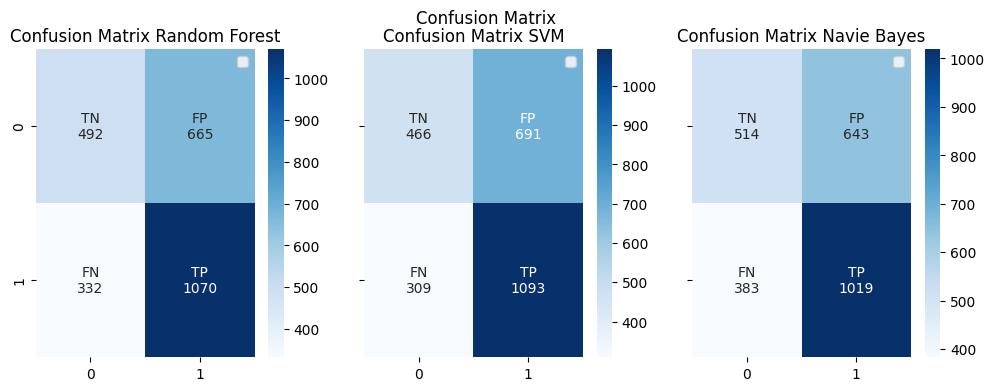

In [297]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=len(estimators), figsize=(12, 4), sharey=True)
fig.suptitle("Confusion Matrix")
group_names = ["TN", "FP", "FN", "TP"]

models = [clf_rf, clf_svc, clf_nb]
models_name = ["Random Forest", "SVM", "Navie Bayes"]

# Plot Confusion matrix
for idx, model in enumerate(models):
    ax[idx].legend(handles[: len(estimators)], ["Training Score", "Test Score"])
    ax[idx].set_title(f"Confusion Matrix {models_name[idx]}")
    
    cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cnf_matrix, ax=ax[idx], annot=labels, fmt="", cmap="Blues")

fig.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")